In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Final_df.csv")

In [3]:
df.head()

,Temperature(C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Count,Growth_rate,Type_Growth,Growth speed,Final Growth
0,23.75,80,27.736,7.04911,5.15546,114,3174,0.0,Less Growth,Slow Growth,Less and Slow Growth
1,23.75,80,4.195,7.09450,4.53072,114,3174,0.0,Less Growth,Slow Growth,Less and Slow Growth
2,23.75,80,10.310,7.07635,5.21473,113,3174,0.0,Less Growth,Slow Growth,Less and Slow Growth
3,23.75,81,1.196,7.07181,5.41747,100,3174,0.0,Less Growth,Slow Growth,Less and Slow Growth
4,23.75,80,2.338,7.08996,5.45899,112,3174,0.0,Less Growth,Slow Growth,Less and Slow Growth


In [4]:
df["Turbidity(NTU)"].unique()

array([ 80,  81,  79,  78,  77,  76,  82,  17,  16,  15,  14,  18,  24,
        13,  12,  23,  21,  20,  19,  22,  26,  27,  28,  25,  32,  31,
        30,  34,  33,  29,  11,  10,  35,  36,  37,  38,  39,  40,  41,
        49,  60,  72,  74,  62,  75,  47,  48,  51,  52,  57,  59,  66,
        69,  42,  43,  44,  45,  46,  61,  85,  93,  89,  88,  87,  90,
        91,  92,  94,  84,  83,  95,  96,  97,  86,  98,  99, 100,  68,
        70,  71,  73,  55,  50,  64,  67,   8,  56,  53,  65,  54,  63,
        58], dtype=int64)

In [5]:
df["Temperature(C)"].unique()

array([  23.75  ,   23.6875,   23.625 ,   23.5625,   23.5   ,   23.4375,
         23.375 ,   23.3125,   23.25  ,   23.1875,   23.875 ,   23.8125,
         23.9375,   24.    ,   24.0625,   24.125 ,   24.1875,   24.25  ,
         24.375 ,   24.3125,   24.4375,   24.5   ,   24.5625,   24.625 ,
         24.75  ,   24.6875,   24.8125,   24.875 ,   24.9375,   25.    ,
         25.0625,   25.125 ,   25.1875,   25.25  ,   26.1875,   26.    ,
         26.375 ,   26.4375,   26.5   ,   26.5625,   26.3125,   26.25  ,
         26.125 ,   26.0625,   25.9375,   25.875 ,   25.8125,   25.75  ,
         25.6875,   25.625 ,   25.5625,   25.5   ,   25.4375,   25.375 ,
         25.3125,   23.125 ,   23.0625,   23.    ,   22.9375,   22.875 ,
         22.8125,   22.75  ,   22.6875,   22.625 ,   22.5625,   22.5   ,
         22.4375,   22.375 ,   22.3125, -127.    ,   25.66  ])

<AxesSubplot:>

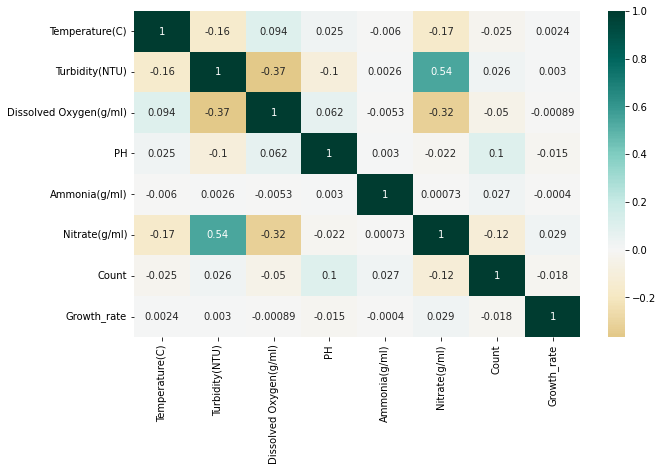

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

Hence We can see that columns are not much correlated

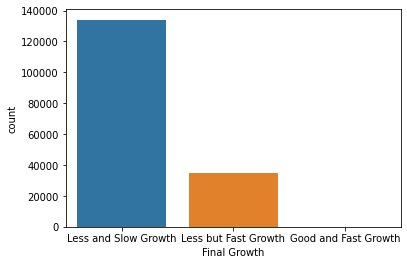

In [7]:
sns.countplot(x ='Final Growth', data = df)
 
# Show the plot
plt.show()

In [8]:
!pip install imbalanced-learn


     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


# Handling imabalanced dataset by Under Sampling

In [9]:
x = df.drop(["Count", "Growth_rate", "Type_Growth","Growth speed", "Final Growth"], axis =1)

In [10]:
y = df["Final Growth"]

In [12]:
from imblearn.under_sampling import RandomUnderSampler

In [14]:


rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)



# Before Under Sampling

<AxesSubplot:xlabel='Final Growth', ylabel='count'>

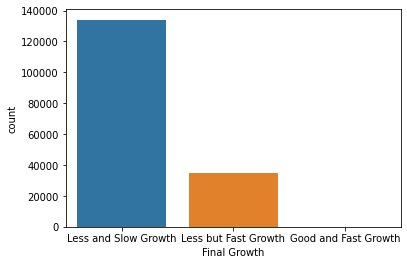

In [15]:
sns.countplot(x = y)

# After Under Sampling

<AxesSubplot:xlabel='Final Growth', ylabel='count'>

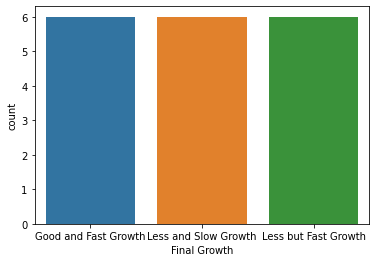

In [16]:
sns.countplot(x= y_rus)

In [17]:
len(y_rus)

18

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)

<AxesSubplot:xlabel='Final Growth', ylabel='count'>

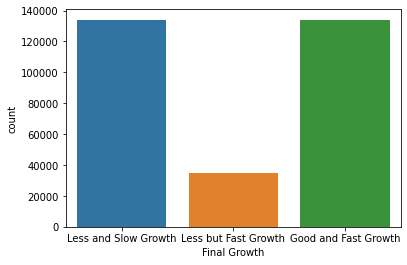

In [20]:
sns.countplot(x= y_over)

In [21]:
y_over

0         Less and Slow Growth
1         Less and Slow Growth
2         Less and Slow Growth
3         Less and Slow Growth
4         Less and Slow Growth
                  ...         
303227    Good and Fast Growth
303228    Good and Fast Growth
303229    Good and Fast Growth
303230    Good and Fast Growth
303231    Good and Fast Growth
Name: Final Growth, Length: 303232, dtype: object

In [22]:
x_over

,Temperature(C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml)
0,23.7500,80,27.736,7.04911,5.15546,114
1,23.7500,80,4.195,7.09450,4.53072,114
2,23.7500,80,10.310,7.07635,5.21473,113
3,23.7500,81,1.196,7.07181,5.41747,100
4,23.7500,80,2.338,7.08996,5.45899,112
...,...,...,...,...,...,...
303227,23.9375,100,5.080,7.26246,0.00075,490
303228,25.3750,100,5.080,2.01484,0.00005,3870
303229,24.3750,100,3.135,2.70938,0.00004,1563
303230,24.1875,97,21.299,7.24885,73.59457,91


In [24]:
balanced_data = pd.concat([x_over, y_over], axis=1)

In [25]:
balanced_data.head()

,Temperature(C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Final Growth
0,23.75,80,27.736,7.04911,5.15546,114,Less and Slow Growth
1,23.75,80,4.195,7.09450,4.53072,114,Less and Slow Growth
2,23.75,80,10.310,7.07635,5.21473,113,Less and Slow Growth
3,23.75,81,1.196,7.07181,5.41747,100,Less and Slow Growth
4,23.75,80,2.338,7.08996,5.45899,112,Less and Slow Growth


In [26]:
balanced_data.to_csv("Balanced_data.csv", index=False)